<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imporando-Pacotes" data-toc-modified-id="Imporando-Pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imporando Pacotes</a></span></li><li><span><a href="#Função-de-Entrada" data-toc-modified-id="Função-de-Entrada-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Função de Entrada</a></span></li><li><span><a href="#Dicionários" data-toc-modified-id="Dicionários-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dicionários</a></span></li><li><span><a href="#Cenários" data-toc-modified-id="Cenários-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cenários</a></span></li><li><span><a href="#Otimização" data-toc-modified-id="Otimização-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otimização</a></span></li></ul></div>

# Imporando Pacotes

In [1]:
# Importando as bibliotecas
import numpy as np # pacote para funções matemáticas
import pandas as pd # pacote para a manipulação dos dados em tabela
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt # pacote para fazer gráficos
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


import pandas_ta as ta
import talib
import mplfinance as mpf

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

pd.set_option("display.max_columns", 40)
pd.set_option('display.max_rows', 500)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from futures_backtester import Backtester

# Função de Entrada

In [3]:
import importlib
name_strategy = 'gold_rsi_trend'  # Nome da função/classe no módulo entries
module = importlib.import_module('entries')
entrada = getattr(module, name_strategy)

# Dicionários

In [4]:
from config.dicts_params import dict_custos, dict_valor_lot, dict_path

# Cenários

In [5]:
# 5 min - win
{'sl': 250, 'tp': 550, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 70}
{'sl': 1727, 'tp': 1728, 'LENGTH_RSI': 4, 'RSI_LOW': 36, 'RSI_HIGH': 69} # 10h
{'sl': 630, 'tp': 1500, 'LENGTH_RSI': 7, 'RSI_LOW': 32, 'RSI_HIGH': 50} 
{'sl': 610, 'tp': 1500, 'LENGTH_RSI': 4, 'RSI_LOW': 21, 'RSI_HIGH': 69} # 11h

# 5 min - wdo
{'sl': 18, 'tp': 8, 'LENGTH_RSI': 8, 'RSI_LOW': 28, 'RSI_HIGH': 73}
{'sl': 11, 'tp': 27, 'LENGTH_RSI': 15, 'RSI_LOW': 26, 'RSI_HIGH': 65}
{'sl': 23, 'tp': 31, 'LENGTH_RSI': 11, 'RSI_LOW': 38, 'RSI_HIGH': 62}
{'sl': 18, 'tp': 34, 'LENGTH_RSI': 9, 'RSI_LOW': 25, 'RSI_HIGH': 69}
{'sl': 13, 'tp': 32, 'LENGTH_RSI': 14, 'RSI_LOW': 29, 'RSI_HIGH': 63}

# wsp
{'sl': 16, 'tp': 35, 'LENGTH_RSI': 14, 'RSI_LOW': 21, 'RSI_HIGH': 68}

{'sl': 23, 'tp': 31, 'LENGTH_RSI': 11, 'RSI_LOW': 38, 'RSI_HIGH': 62}

In [21]:
#params = {'sl': 0.00800, 'tp': 0.00400, 'LENGTH_RSI': 15, 'RSI_LOW': 35, 'RSI_HIGH': 65}
#params = {'sl': 0.10000, 'tp': 0.30000, 'LENGTH_RSI': 9, 'RSI_LOW': 35, 'RSI_HIGH': 65}
#params = {'sl': 0.10000, 'tp': 0.30000, 'LENGTH_RSI': 9, 'RSI_LOW': 40, 'RSI_HIGH': 60}
#params = {'sl': 300, 'tp': 500, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 70}

In [64]:
params ={'sl': 18, 'tp': 34, 'LENGTH_RSI': 14, 'RSI_LOW': 29, 'RSI_HIGH': 63}

In [65]:
# Configurar o backtester
sym = 'WIN@N'
sym = 'WSP@N'
#sym = 'BIT@N'
#sym = 'WDO@N'
#sym = 'EURJPY'
#sym = 'GBPJPY'
#sym = 'USDJPY'

bt = Backtester(
    symbol = sym,
    timeframe = 't5',
    data_ini = '2019-01-01',
    data_fim = '2025-06-30',
    tp = params['tp'],
    sl = params['sl'],
    slippage = 0,
    tc = dict_custos[sym], # $ per lot
    lote = 1,
    valor_lote= dict_valor_lot[sym],
    initial_cash = 30000,
    path_base= dict_path[sym],
    daytrade = True
)

# Parâmetros da estratégia RSI
LENGTH_RSI = params['LENGTH_RSI']
RSI_LOW = params['RSI_LOW']
RSI_HIGH = params['RSI_HIGH']

# Executa o backtest com a estratégia RSI
results, metrics = bt.run(
    signal_function=entrada, 
    signal_args={
        "length_rsi": LENGTH_RSI,
        "rsi_low": RSI_LOW,
        "rsi_high": RSI_HIGH,
        'allowed_hours': [10,11,12,13],
        #'allowed_hours': [10],
        'position_type': "both"
    }
)

# Print de métricas
bt.print_metrics(metrics)

RELATÓRIO DE DESEMPENHO
Símbolo: WSP@N
Timeframe: t5
Período: 2019-01-01 a 2025-06-30

--- RESULTADOS ---
Saldo Inicial: $30000.00
Saldo Final: $35598.75
Retorno Total: $5598.75 (18.66%)
Retorno Anualizado: 4.17%
Volatilidade Anualizada: 6.34%

--- DRAWDOWN ---
Drawdown Máximo: 5.06%
Drawdown Máximo (Valor): $1652.62
Tempo Máximo em Drawdown: 26393.0 períodos
Tempo em Drawdown: 94.91% do total

--- TRADES ---
Total de Trades: 2670
Trades Vencedores: 1241 (46.48%)
Trades Perdedores: 1429 (53.52%)
Saídas por TP: 18.58%
Saídas por SL: 42.32%
Saídas por Tempo: 39.10%

--- RATIOS ---
Sharpe Ratio: 0.658
Sortino Ratio: 1.517
Calmar Ratio: 0.824
Profit Factor: 1.097

--- ANÁLISE DE GANHOS/PERDAS ---
Ganho Médio: $50.95
Perda Média: $40.33
Win/Loss Ratio: 1.26
Expectancy: $2.10


<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1400x1000 with 0 Axes>

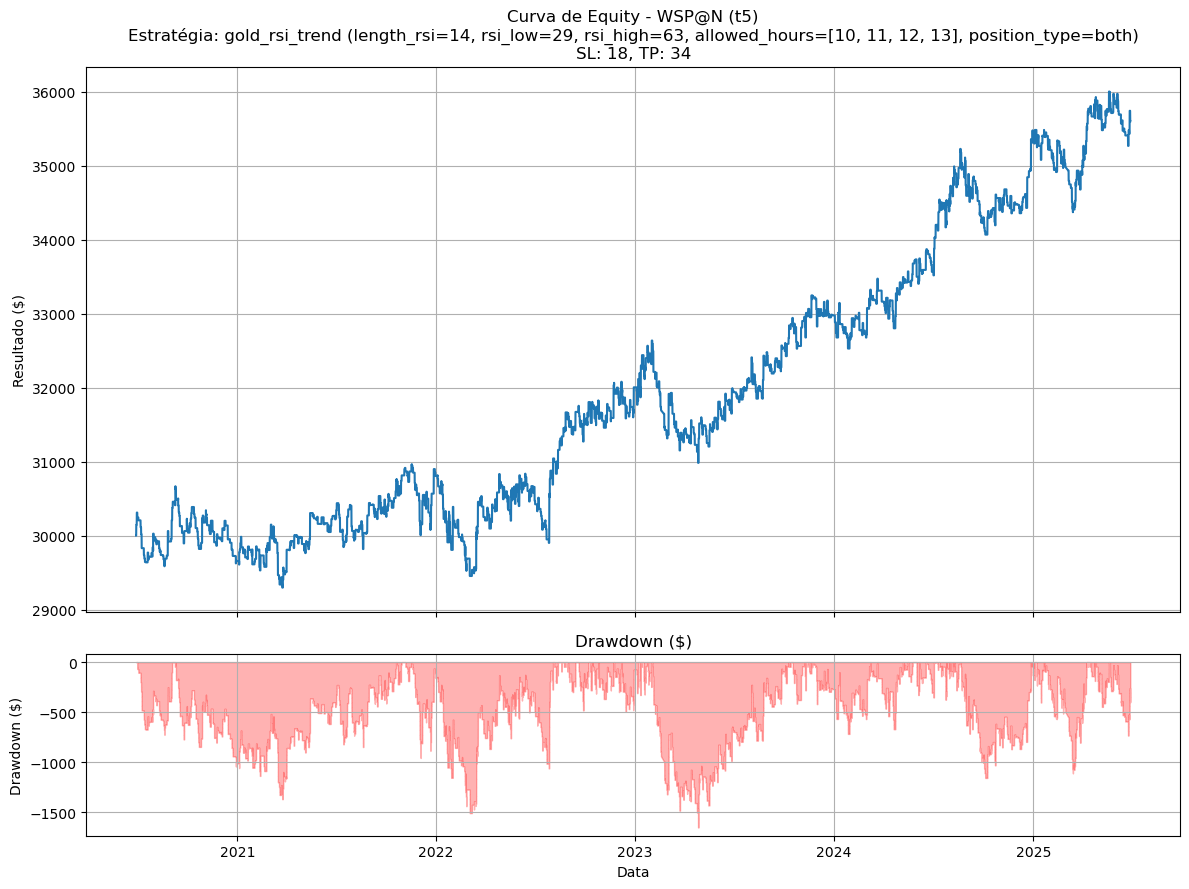

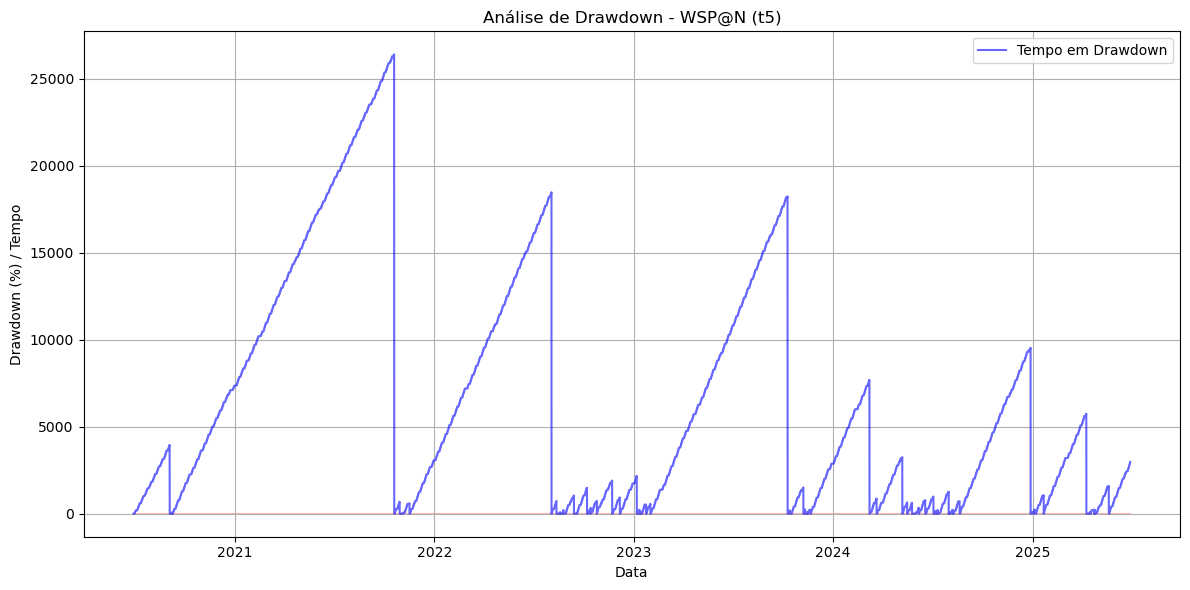

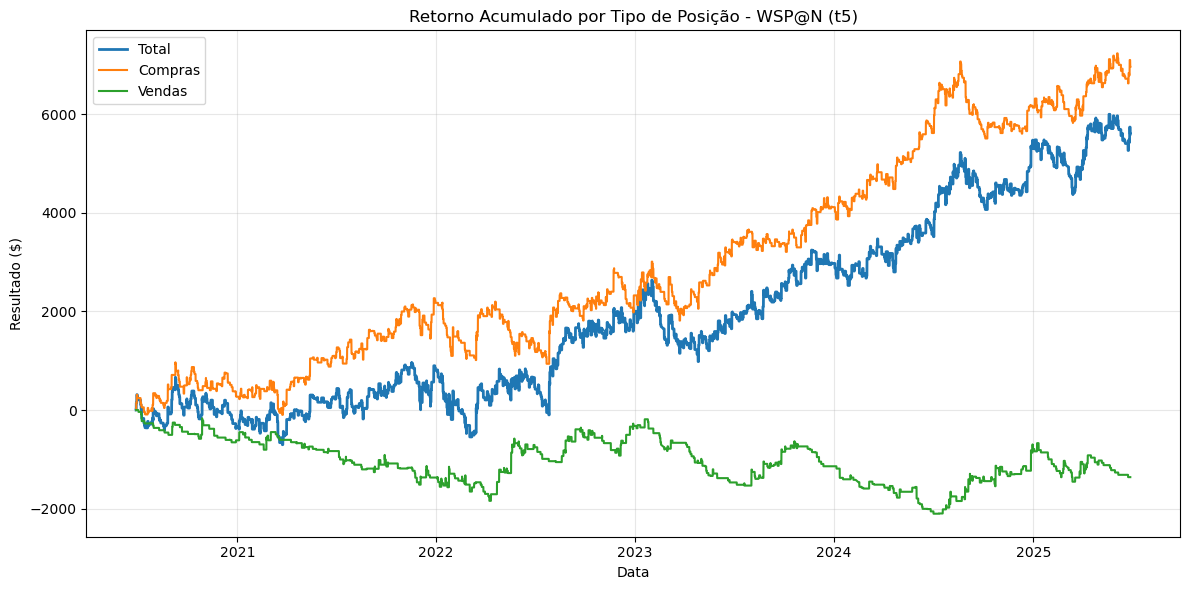

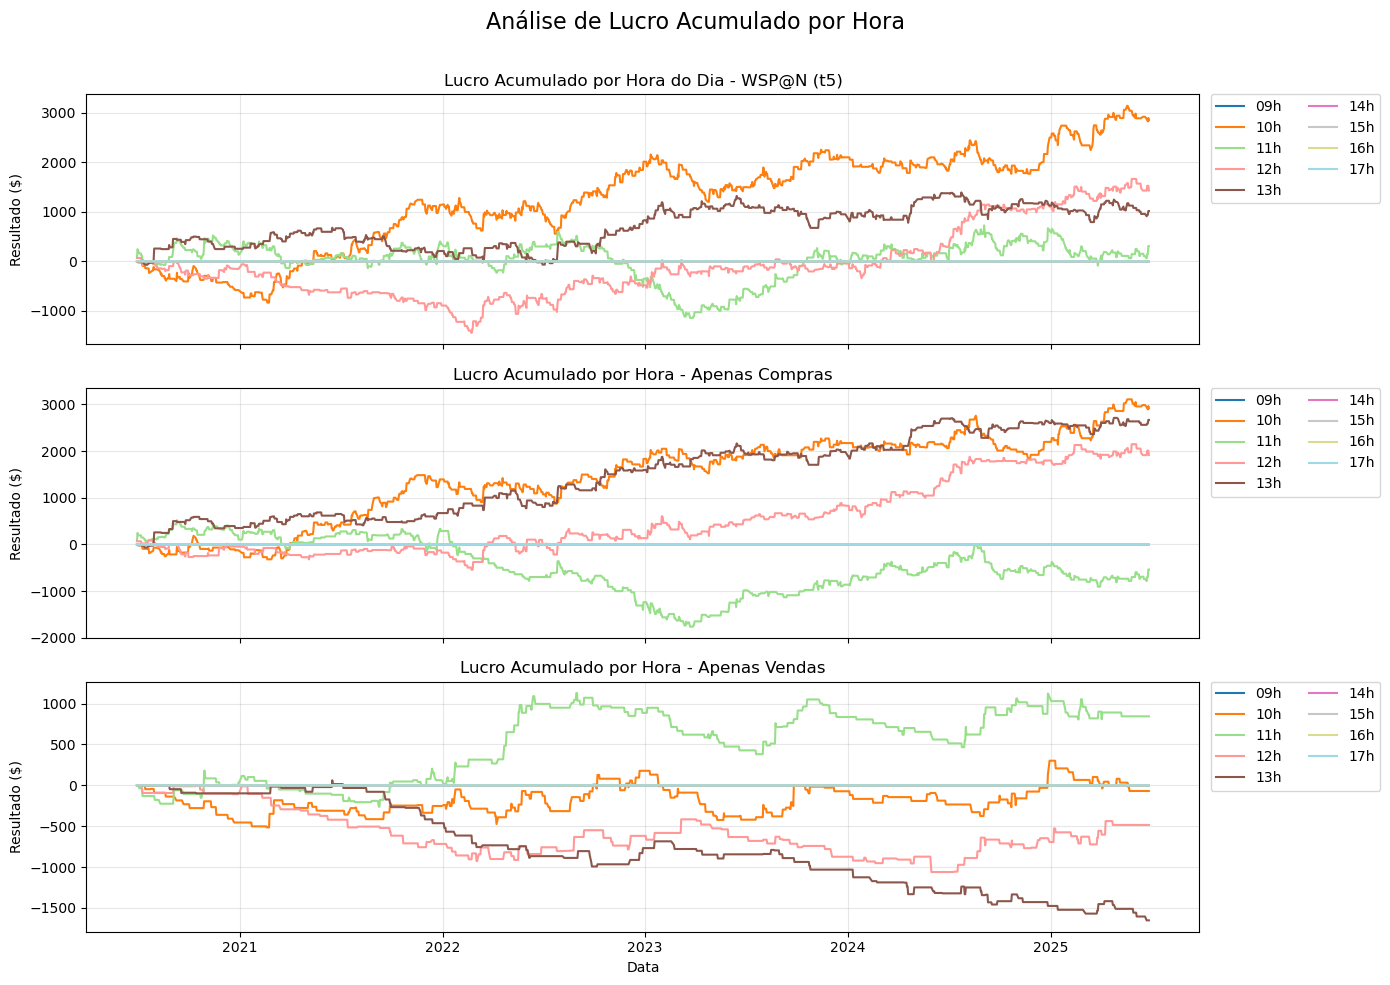

In [66]:
# Plotar a curva de equity com drawdown
plt.figure(figsize=(14, 10))

# 1. Curva de equity
plt = bt.plot_equity_curve(include_drawdown=True)

# 2. Análise detalhada de drawdown
plt = bt.plot_drawdown()

# 3. resultado por hora
bt.plot_by_position()
bt.plot_cumulative_by_hour()

# Otimização

In [67]:
def objective_ind(trial):  
    
    '''
    função para maximizar os ganhos no mini-indice
    '''

    # Configurar o backtester
    sym = 'WSP@N'
    bt = Backtester(
        symbol = sym,
        timeframe = 't5',
        data_ini = '2020-06-01',
        data_fim = '2025-12-31',
        sl = trial.suggest_int('sl', 1, 35),
        tp = trial.suggest_int('tp', 1, 35),
        slippage = 0,
        tc = dict_custos[sym], # $ per lot
        lote = 1,
        valor_lote= dict_valor_lot[sym],
        initial_cash = 30000,
        path_base= dict_path[sym],
        daytrade = True
    )
    
    # Parâmetros da estratégia RSI
    LENGTH_RSI = trial.suggest_int('LENGTH_RSI', 4, 14)
    RSI_LOW = trial.suggest_int('RSI_LOW', 20, 50)
    RSI_HIGH = trial.suggest_int('RSI_HIGH', 50, 80)
    
    # Executa o backtest com a estratégia RSI
    _, metrics = bt.run(
        signal_function=entrada, 
        signal_args={
            "length_rsi": LENGTH_RSI,
            "rsi_low": RSI_LOW,
            "rsi_high": RSI_HIGH,
            'allowed_hours': [11],
            'position_type': "both"
        }
    )

    
    metrica = metrics['total_return']
    #metrica = metrics['max_drawdown_value']
        
    return metrica

In [68]:
study = optuna.create_study(direction="maximize")

study.optimize(objective_ind, n_trials=220)

[I 2025-06-28 21:34:03,056] A new study created in memory with name: no-name-fc557eda-9371-41b5-b520-e2828db10d55
[I 2025-06-28 21:34:03,744] Trial 0 finished with value: -1342.375 and parameters: {'sl': 2, 'tp': 26, 'LENGTH_RSI': 5, 'RSI_LOW': 42, 'RSI_HIGH': 74}. Best is trial 0 with value: -1342.375.
[I 2025-06-28 21:34:04,430] Trial 1 finished with value: -1052.75 and parameters: {'sl': 16, 'tp': 10, 'LENGTH_RSI': 13, 'RSI_LOW': 35, 'RSI_HIGH': 73}. Best is trial 1 with value: -1052.75.
[I 2025-06-28 21:34:05,094] Trial 2 finished with value: -1432.375 and parameters: {'sl': 17, 'tp': 15, 'LENGTH_RSI': 5, 'RSI_LOW': 45, 'RSI_HIGH': 80}. Best is trial 1 with value: -1052.75.
[I 2025-06-28 21:34:05,759] Trial 3 finished with value: -819.5 and parameters: {'sl': 6, 'tp': 31, 'LENGTH_RSI': 5, 'RSI_LOW': 33, 'RSI_HIGH': 77}. Best is trial 3 with value: -819.5.
[I 2025-06-28 21:34:06,456] Trial 4 finished with value: 1438.125 and parameters: {'sl': 18, 'tp': 35, 'LENGTH_RSI': 10, 'RSI_LO

[I 2025-06-28 21:34:30,935] Trial 40 finished with value: 999.75 and parameters: {'sl': 9, 'tp': 35, 'LENGTH_RSI': 4, 'RSI_LOW': 20, 'RSI_HIGH': 65}. Best is trial 31 with value: 1602.5.
[I 2025-06-28 21:34:31,651] Trial 41 finished with value: 392.375 and parameters: {'sl': 9, 'tp': 35, 'LENGTH_RSI': 4, 'RSI_LOW': 21, 'RSI_HIGH': 66}. Best is trial 31 with value: 1602.5.
[I 2025-06-28 21:34:32,423] Trial 42 finished with value: 1190.375 and parameters: {'sl': 6, 'tp': 33, 'LENGTH_RSI': 5, 'RSI_LOW': 23, 'RSI_HIGH': 64}. Best is trial 31 with value: 1602.5.
[I 2025-06-28 21:34:33,120] Trial 43 finished with value: 691.0 and parameters: {'sl': 4, 'tp': 33, 'LENGTH_RSI': 5, 'RSI_LOW': 20, 'RSI_HIGH': 70}. Best is trial 31 with value: 1602.5.
[I 2025-06-28 21:34:33,843] Trial 44 finished with value: 1450.125 and parameters: {'sl': 7, 'tp': 34, 'LENGTH_RSI': 5, 'RSI_LOW': 23, 'RSI_HIGH': 65}. Best is trial 31 with value: 1602.5.
[I 2025-06-28 21:34:34,567] Trial 45 finished with value: 319

[I 2025-06-28 21:34:59,761] Trial 81 finished with value: -1988.25 and parameters: {'sl': 21, 'tp': 34, 'LENGTH_RSI': 9, 'RSI_LOW': 26, 'RSI_HIGH': 53}. Best is trial 71 with value: 2139.375.
[I 2025-06-28 21:35:00,460] Trial 82 finished with value: 3130.5 and parameters: {'sl': 16, 'tp': 33, 'LENGTH_RSI': 10, 'RSI_LOW': 29, 'RSI_HIGH': 57}. Best is trial 82 with value: 3130.5.
[I 2025-06-28 21:35:01,166] Trial 83 finished with value: 213.0 and parameters: {'sl': 15, 'tp': 33, 'LENGTH_RSI': 11, 'RSI_LOW': 28, 'RSI_HIGH': 54}. Best is trial 82 with value: 3130.5.
[I 2025-06-28 21:35:01,865] Trial 84 finished with value: 1791.125 and parameters: {'sl': 23, 'tp': 34, 'LENGTH_RSI': 10, 'RSI_LOW': 31, 'RSI_HIGH': 58}. Best is trial 82 with value: 3130.5.
[I 2025-06-28 21:35:02,535] Trial 85 finished with value: 3166.75 and parameters: {'sl': 16, 'tp': 32, 'LENGTH_RSI': 10, 'RSI_LOW': 31, 'RSI_HIGH': 58}. Best is trial 85 with value: 3166.75.
[I 2025-06-28 21:35:03,242] Trial 86 finished wit

[I 2025-06-28 21:35:27,732] Trial 121 finished with value: 3588.25 and parameters: {'sl': 12, 'tp': 32, 'LENGTH_RSI': 9, 'RSI_LOW': 29, 'RSI_HIGH': 57}. Best is trial 121 with value: 3588.25.
[I 2025-06-28 21:35:28,429] Trial 122 finished with value: 3677.625 and parameters: {'sl': 13, 'tp': 33, 'LENGTH_RSI': 9, 'RSI_LOW': 29, 'RSI_HIGH': 57}. Best is trial 122 with value: 3677.625.
[I 2025-06-28 21:35:29,093] Trial 123 finished with value: -2682.125 and parameters: {'sl': 13, 'tp': 11, 'LENGTH_RSI': 9, 'RSI_LOW': 29, 'RSI_HIGH': 56}. Best is trial 122 with value: 3677.625.
[I 2025-06-28 21:35:29,807] Trial 124 finished with value: 1750.125 and parameters: {'sl': 10, 'tp': 32, 'LENGTH_RSI': 9, 'RSI_LOW': 29, 'RSI_HIGH': 57}. Best is trial 122 with value: 3677.625.
[I 2025-06-28 21:35:30,472] Trial 125 finished with value: 1611.75 and parameters: {'sl': 12, 'tp': 33, 'LENGTH_RSI': 9, 'RSI_LOW': 28, 'RSI_HIGH': 55}. Best is trial 122 with value: 3677.625.
[I 2025-06-28 21:35:31,139] Tria

[I 2025-06-28 21:35:54,201] Trial 161 finished with value: 3164.25 and parameters: {'sl': 16, 'tp': 35, 'LENGTH_RSI': 10, 'RSI_LOW': 31, 'RSI_HIGH': 58}. Best is trial 134 with value: 3960.0.
[I 2025-06-28 21:35:54,853] Trial 162 finished with value: 3164.25 and parameters: {'sl': 16, 'tp': 35, 'LENGTH_RSI': 10, 'RSI_LOW': 31, 'RSI_HIGH': 58}. Best is trial 134 with value: 3960.0.
[I 2025-06-28 21:35:55,482] Trial 163 finished with value: 2113.25 and parameters: {'sl': 16, 'tp': 35, 'LENGTH_RSI': 10, 'RSI_LOW': 31, 'RSI_HIGH': 60}. Best is trial 134 with value: 3960.0.
[I 2025-06-28 21:35:56,122] Trial 164 finished with value: 3164.25 and parameters: {'sl': 16, 'tp': 35, 'LENGTH_RSI': 10, 'RSI_LOW': 31, 'RSI_HIGH': 58}. Best is trial 134 with value: 3960.0.
[I 2025-06-28 21:35:56,776] Trial 165 finished with value: 2356.125 and parameters: {'sl': 17, 'tp': 35, 'LENGTH_RSI': 10, 'RSI_LOW': 31, 'RSI_HIGH': 59}. Best is trial 134 with value: 3960.0.
[I 2025-06-28 21:35:57,447] Trial 166 f

[I 2025-06-28 21:36:20,801] Trial 202 finished with value: 3127.625 and parameters: {'sl': 14, 'tp': 33, 'LENGTH_RSI': 9, 'RSI_LOW': 31, 'RSI_HIGH': 56}. Best is trial 134 with value: 3960.0.
[I 2025-06-28 21:36:21,495] Trial 203 finished with value: 3499.25 and parameters: {'sl': 14, 'tp': 32, 'LENGTH_RSI': 9, 'RSI_LOW': 31, 'RSI_HIGH': 57}. Best is trial 134 with value: 3960.0.
[I 2025-06-28 21:36:22,162] Trial 204 finished with value: 3314.625 and parameters: {'sl': 14, 'tp': 32, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 56}. Best is trial 134 with value: 3960.0.
[I 2025-06-28 21:36:22,793] Trial 205 finished with value: 2965.5 and parameters: {'sl': 14, 'tp': 34, 'LENGTH_RSI': 10, 'RSI_LOW': 31, 'RSI_HIGH': 57}. Best is trial 134 with value: 3960.0.
[I 2025-06-28 21:36:23,439] Trial 206 finished with value: 3863.125 and parameters: {'sl': 14, 'tp': 32, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 57}. Best is trial 134 with value: 3960.0.
[I 2025-06-28 21:36:24,081] Trial 207 fini

In [51]:
study.best_params

{'sl': 13, 'tp': 32, 'LENGTH_RSI': 14, 'RSI_LOW': 29, 'RSI_HIGH': 63}

In [ ]:
plot_param_importances(study)